In [12]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import sys

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [14]:
Inputs = x_train[0:1000].reshape(1000,28*28)/255
targets = y_train[0:1000]

In [15]:
test_images = x_test.reshape(len(x_test), 28*28) / 255
test_labels = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels[i][l] = 1


In [16]:
one_hot_labels = np.zeros((len(targets), 10))
for i, l in enumerate(targets):
    one_hot_labels[i][l] = 1
target = one_hot_labels


In [17]:
# inner Layer activation functions
def tanh(x):
    return np.tanh(x)
    
def tanh2deriv(x):
    return 1 - (x**2)

In [18]:
def relu(x):
    return (x>=0)*x
def relu2deriv(x):
    return x>=0

In [19]:
#Output Layer activation Functions
def softmax(x):
    temp=  np.exp(x)
    return temp/np.sum(temp,keepdims=True,axis=1)

In [20]:
alpha = 0.001
iterations =450
hidden_layer_size = 200
np.random.seed(1)
number_pixles = 784
weight_0_1 = 0.02*np.random.random((number_pixles,hidden_layer_size))-0.01
weight_1_2 = 0.2*np.random.random((hidden_layer_size,10))-0.1


In [21]:
for i in range(iterations):
    correct_cnt = 0
    for j in range(len(Inputs)):
        
        layer_0 = Inputs[j:j+1]
        layer_1 = tanh(np.dot(layer_0,weight_0_1))

        dropout_mask = np.random.randint(2,size=layer_1.size)
        layer_1 *= dropout_mask*2
        layer_2 = softmax(np.dot(layer_1,weight_1_2))
        correct_cnt += int(np.argmax(layer_2) == np.argmax(target[j:j+1]))
       # error += np.sum((target[j:j+1]-layer_2)**2)
        
        layer_2_delta = (target[j:j+1]-layer_2)   
        layer_1_delta = layer_2_delta.dot(weight_1_2.T)*tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask
        weight_1_2 += alpha*layer_1.T.dot(layer_2_delta)
        weight_0_1 += alpha*layer_0.T.dot(layer_1_delta)
    
    sys.stdout.write("\r" +
                     " I:"+str(i) +
                     " Correct:" + str(correct_cnt/float(len(Inputs))))
    if(i % 10 == 0 or i == iterations-1):
        error, correct_cnt = (0.0, 0)
        for  k in range(len(test_images)):
            layer_0 = test_images[k:k+1]
            layer_1 = tanh(np.dot(layer_0, weight_0_1))
            layer_2 = softmax(np.dot(layer_1, weight_1_2))
           # error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            correct_cnt += int(np.argmax(layer_2) ==
                               np.argmax(test_labels[k:k+1]))
        sys.stdout.write(" Test-Acc:" + str(correct_cnt/float(len(test_images))))
        print()
   


 I:0 Correct:0.514 Test-Acc:0.6808
 I:10 Correct:0.855 Test-Acc:0.8197
 I:20 Correct:0.898 Test-Acc:0.8477
 I:30 Correct:0.925 Test-Acc:0.8567
 I:40 Correct:0.94 Test-Acc:0.8637
 I:50 Correct:0.95 Test-Acc:0.8661
 I:60 Correct:0.954 Test-Acc:0.8662
 I:70 Correct:0.961 Test-Acc:0.8688
 I:80 Correct:0.965 Test-Acc:0.8694
 I:90 Correct:0.975 Test-Acc:0.8704
 I:100 Correct:0.977 Test-Acc:0.8707
 I:110 Correct:0.981 Test-Acc:0.8726
 I:120 Correct:0.982 Test-Acc:0.8742
 I:130 Correct:0.976 Test-Acc:0.8742
 I:140 Correct:0.989 Test-Acc:0.8759
 I:150 Correct:0.985 Test-Acc:0.8766
 I:160 Correct:0.977 Test-Acc:0.8782
 I:170 Correct:0.991 Test-Acc:0.8774
 I:180 Correct:0.991 Test-Acc:0.8777
 I:190 Correct:0.987 Test-Acc:0.8784
 I:200 Correct:0.992 Test-Acc:0.8776
 I:210 Correct:0.992 Test-Acc:0.8789
 I:220 Correct:0.994 Test-Acc:0.8807
 I:230 Correct:0.992 Test-Acc:0.8791
 I:240 Correct:0.994 Test-Acc:0.8806
 I:250 Correct:0.994 Test-Acc:0.8817
 I:260 Correct:0.99 Test-Acc:0.8824
 I:270 Correct:

In [22]:
weight_1_2[0]

array([-0.23576423,  0.39940443, -0.22894977, -0.36199746, -0.06770245,
        0.08344135,  0.22057008,  0.22892419, -0.27536447,  0.18720588])

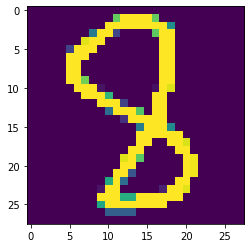

In [23]:
#Handwritten Data
import cv2 as cv
import matplotlib.pyplot as plt
image = cv.imread('test.png')
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret, image = cv.threshold(image, 120, 255, cv.THRESH_BINARY)
image = cv.resize(image,(28,28))
plt.imshow(image)

In [38]:
ip = np.array(image)/255
ip= ip.reshape((1,28*28))
ip.shape
layer_0 = ip
layer_1 = tanh(np.dot(layer_0,weight_0_1))
layer_2 = softmax(np.dot(layer_1,weight_1_2))
np.argmax(layer_2)+1

8

(784,)